Íñigo Martín Melero

Práctica Opcional 1: Pokemon.

He de decir que de pequeño me gustaban mucho los Pokemon. Aun ahora tengo un emulador de Nintendo en la Tablet con el que sigo jugando a algunos, por lo que puedo dar un poco de contexto a los datos. La BBDD proporcionada incluye los Pokemon, según Pokedex Nacional, desde la Generación I hasta la VII.

0. Carga de Datos en DataFrame

In [34]:
#Importamos pandas y matplotlib, y leemos con read_csv para cargar directamente un DataFrame.

import pandas as pd
import matplotlib.pyplot as plt

pokemonDF=pd.read_csv('C:/Users/inima/JupyterNotebook/Z.Tareas/EjercicioOpcional1/pokemon.csv')
print(pokemonDF)

                       abilities  against_bug  against_dark  against_dragon  \
0    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
1    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
..                           ...          ...           ...             ...   
796              ['Beast Boost']         0.25           1.0             0.5   
797              ['Beast Boost']         1.00           1.0             0.5   
798              ['Beast Boost']         2.00           0.5             2.0   
799              ['Prism Armor']         2.00           2.0             1.0   
800               ['Soul-Heart']         0.25           0.5             0.0   

     against_electric  against_fairy  against_fight

1. Representación de 1 variable.

1.1 Frecuencia de cada tipo

<AxesSubplot:title={'center':'Frecuencia de cada tipo de pokemon'}, xlabel='Tipo', ylabel='N. Especies'>

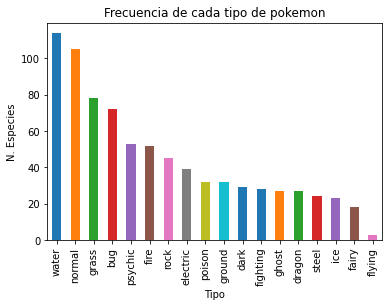

In [35]:
#Visualización sencilla, con un solo plot. Se me han representado todos del mismo color, así que he utilizado sus códigos a 
#partir de https://imagecolorpicker.com/

colors=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#1f77b4','#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2']
pokemonDF['type1'].value_counts().plot.bar(color=colors, xlabel='Tipo',ylabel='N. Especies',title='Frecuencia de cada tipo de pokemon')


Observaciones: El eje X representa el tipo principal de los Pokemon: agua, normal, planta, bicho, psíquico, fuego, roca, eléctrico, veneno, tierra, siniestro, lucha, fantasma, dragón, acero, hielo, hada y volador. Se selecciona "type1" porque hay Pokemon que cuentan con 2 tipos (un tipo principal y otro secundario). 
El eje Y representa cuántos Pokemon hay repartidos por cada tipo. 
Las conclusiones del gráfico son claras: existe una gran abundancia de Pokemon tipo agua (tipo mayoritario), seguido por tipo normal, planta y bicho. El tipo más inhabitual es el Volador. 

1.2 Frecuencia por valor de HP

<AxesSubplot:title={'center':'Frecuencia de pokemon por su valor de HP'}, xlabel='HP', ylabel='N. Especies'>

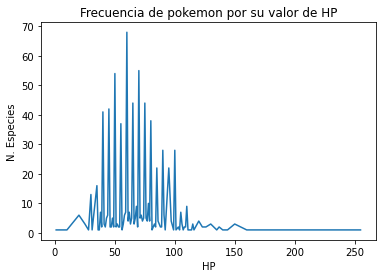

In [36]:
#Contamos los valores de cada tipo y los representamos como línea.

pokemonDF['hp'].value_counts().sort_index().plot.line(xlabel='HP',ylabel='N. Especies',title='Frecuencia de pokemon por su valor de HP')

Observaciones: Los Healthpoints (HP) son los puntos de salud que tiene un Pokemon (Eje X). El Eje Y representa el número de especies de Pokemon que tienen ciertos HP. 
A la vista del gráfico, la mayoría de especies se sitúan entre los 50 y 100 HP; esto suele coincidir con las terceras evoluciones de los Pokemon más débiles y de las segundas evoluciones de los más fuertes. Solamente en 150 - 200 HP encontraremos a los legendarios y a los especiales de tipo dragón.
Creo que una mejor forma de representar los datos es mediante barras, pero en intervalos de 10 en 10, ya que no es tan relevante la diferencia entre, por ejemplo, 56 y 57 HP. 

1.3 Distribución de peso

Text(0, 0.5, 'N. Especies')

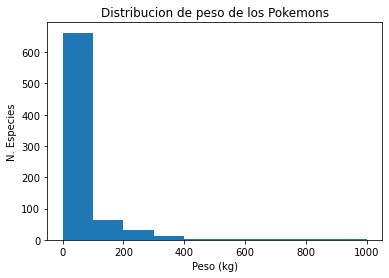

In [37]:
#Ahora, utilizamos un histograma acumulado, seteando aparte las etiquetas de los ejes X e Y.

a=pokemonDF['weight_kg'].plot.hist(title='Distribucion de peso de los Pokemons')
a.set_xlabel("Peso (kg)")
a.set_ylabel('N. Especies')

Observaciones: El eje X representa el peso en kg de los diferentes Pokemon, mientras que el Eje Y representa el número de especies que tienen esos pesos. Sí existen mejores formas de representarlo. Se me ocurriría, de alguna forma, hacer zoom en el intervalo 0 - 200, ya que en ese intervalo hay una gran disparidad de pesos: tipo bicho y planta suelen ser muy ligeros, normal y agua tienen pesos normales...

2. Representación de 2 variables.

2.1 Representación de capacidades de ataque y defensa.

<AxesSubplot:xlabel='attack', ylabel='defense'>

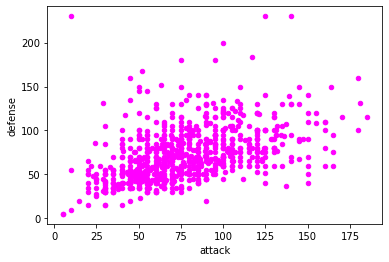

In [38]:
#Representamos un scatter plot y lo pintamos de rosa.

pokemonDF.plot.scatter(x='attack', y='defense', color='#ff00ff')

Observaciones: Los Pokemon están concebidos para pelear en combates, y dos de sus estadísticas más relevantes son su defensa y ataque. La defensa se refiere a cómo encajan los golpes de los Pokemon rivales, mientras que los ataques corresponden a la potencia que tiene el Pokemon para infringir daño al adversario. El Eje X representa el ataque y el Eje Y representa la defensa. La mayoría de los Pokemon tienen defensa y ataque en torno al intervalo 50 - 100. Existen Pokemon con muy alto ataque y baja defensa (poco común), bajo ataque y alta defensa (poco común), baja defensa y bajo ataque (los más débiles, como el tipo bicho) y alta defensa y alto ataque (los legendarios y tipo dragón, normalmente). 

2.2 Relación entre ataque y defensa.

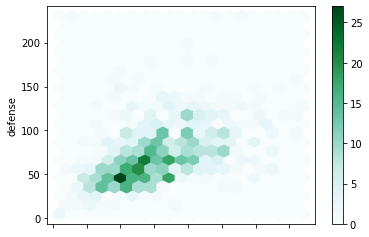

In [39]:
#Representamos con hexbin un ploteo hexagonal, que nos cuenta el número de pokemon en esos intervalos de ataque y defensa.

b=pokemonDF.plot.hexbin(x='attack', y='defense',gridsize=20)

Observaciones: Otra vez, en el eje X representamos el ataque y en el Y la defensa. Este gráfico nos dice la misma información que el anterior, solo que está mejor organizada, ya que con el otro la acumulación de puntos en torno a 50 nos podía hacer perder un poco la perspectiva de los datos. Volvemos a inferir que la mayoría de Pokemons se mueven en unos ataques y defensas en el rango de 50 a 100, siendo el más habitual en torno a 50.

2.3 Relación entre capacidades de ataque y defensa, agrupadas.

<AxesSubplot:xlabel='is_legendary,generation'>

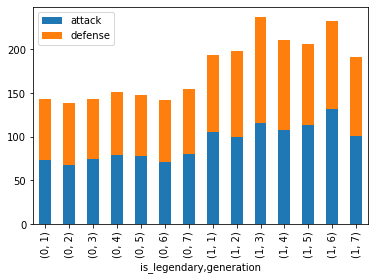

In [40]:
#Apilamos, con el stacked='yes', las dos variables. Previamente debemos agrupar con groupby por legendario y generacion. 

datosDF1=pokemonDF[['is_legendary','generation','attack','defense']]
datosDF2=datosDF1.groupby(['is_legendary','generation']).mean(['attack','defense'])
datosDF2.plot.bar(stacked='yes')

Observaciones: El eje X representa, en forma de tupla: el primer número si el Pokemon es legendario o no (0-> no legendario, 1-> legendario), y el segundo número la generación a la que pertenece (de la 1 a la 7). El eje Y representa la suma de defensa y ataque.
Como hemos mencionado anteriormente, la conclusión es muy clara: los Pokemon Legendarios tienen estadísiticas en torno a 1/3 superiores que los Pokemon normales. 

2.4 Capacidades de cada especie según la generación.

<AxesSubplot:xlabel='generation'>

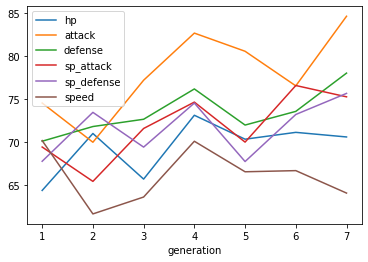

In [60]:
#Primero acotamos las columnas que queremos, y agrupamos por generación. Calculamos la media de cada valor para poder ver
#la evolucion temporal. 

datosDF3=pokemonDF[['generation','hp','attack','defense','sp_attack','sp_defense','speed']]
datosDF4=datosDF3.groupby('generation').mean()
datosDF4.plot.line()   

Observaciones: En el Eje X visualizamos el transcurso de las generaciones, y en el Eje Y cómo varían las estadísticas fundamentales promedio de combate de los Pokemon: hp (puntos salud), ataque y defensa, ataque especial y defensa especial y velocidad. Cada una tiene su patrón particular: la defensa, el ataque y el ataque especial tienen una tendencia creciente, la velocidad decreciente, etc. Esto es completamente a criterio de los diseñadores de videojuegos. 

3. Subgráficas 

3.1 Histograma de ataque y defensa en 2 subgráficos

<AxesSubplot:title={'center':'Pokemon Defense Rating'}, ylabel='Frequency'>

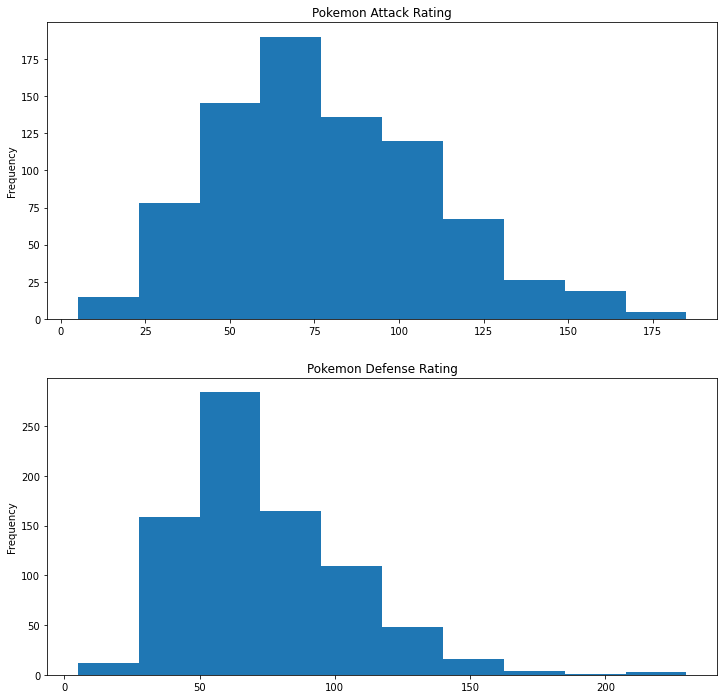

In [42]:
#Este gráfico no nos mostrará información nueva, ya que lo hemos ploteado previamente. 
#En los gráficos con subplots, definimos las coordenadas del subplot, y colocamos cada gráfico en su coordenada. 

fig, axarr = plt.subplots(2, 1, figsize=(12, 12))
pokemonDF['attack'].plot.hist(title='Pokemon Attack Rating',ax=axarr[0])
pokemonDF['defense'].plot.hist(title='Pokemon Defense Rating',ax=axarr[1])

Observaciones: Estos gráficos muestran lo mismo que ya se ha concluido, pero en forma de histograma combinado. 

3.2 Gráficos mixtos en subgráfico

<AxesSubplot:xlabel='base_happiness', ylabel='percentage_male'>

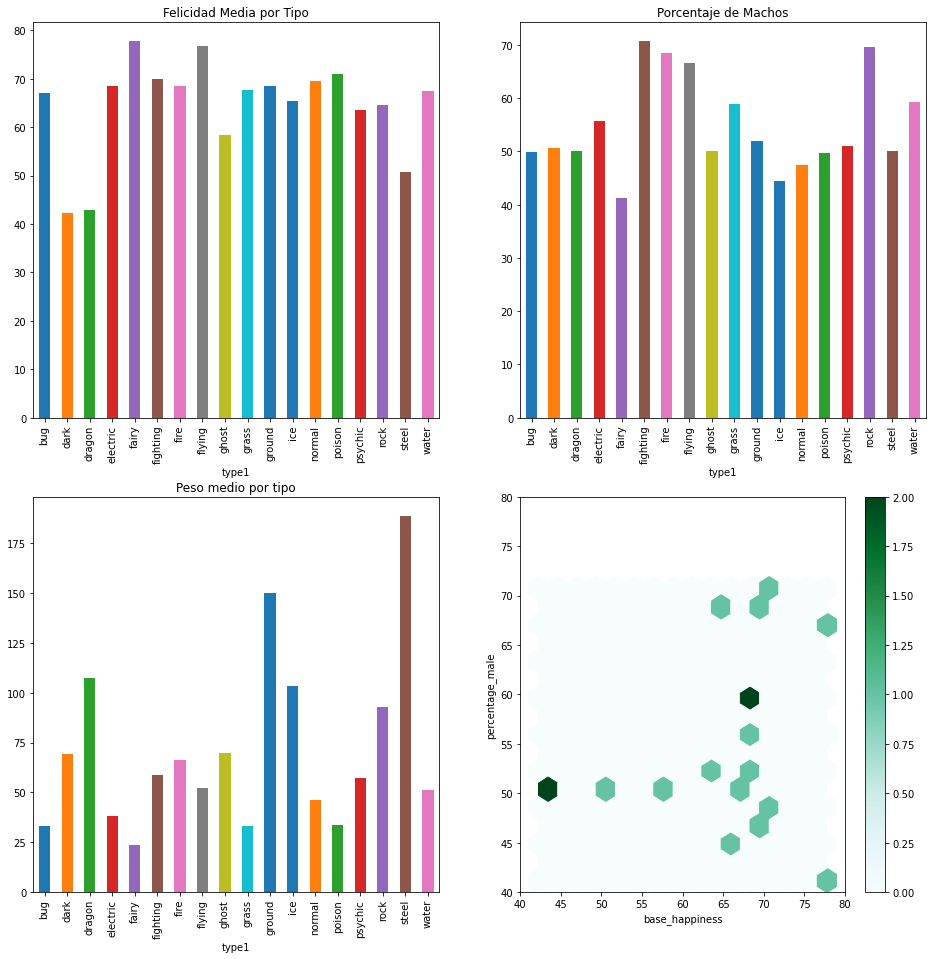

In [59]:
#Este gráfico es más largo. En este caso, nos quedamos solo con las 4 columnas de interés. Agrupamos por tipo y 
#calculamos sus medias. Posteriormente, ya representamos cada una de las variables pedidas. 

colores=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#1f77b4','#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2']
fig, axarr = plt.subplots(2, 2, figsize=(16, 16))
datosDF5=pokemonDF[["base_happiness",'type1','percentage_male','weight_kg']].groupby('type1').mean()
datosDF5['base_happiness'].plot.bar(color=colores,title='Felicidad Media por Tipo', legend=False,ax=axarr[0][0])
datosDF5['percentage_male'].plot.bar(title='Porcentaje de Machos',legend=False,ax=axarr[0][1],color=colores)
datosDF5['weight_kg'].plot.bar(title='Peso medio por tipo',legend=False,ax=axarr[1][0],color=colores)
datosDF9=datosDF5.drop(columns=['weight_kg']).groupby('type1').mean()
datosDF9.plot.hexbin(x='base_happiness', y='percentage_male',gridsize=15,legend=False,ax=axarr[1][1], xlim=[40,80],ylim=[40,80])


Observaciones: De estos gráficos, se extrae que hay tipos de Pokemon con mayores y menores puntos de felicidad base: los de tipo dragón, siniestro y acero son los que menos puntos tienen, mientras que los tipo agua y hada son los que parten con más puntos de amistad. Algunas evoluciones de Pokemon se basan en sus niveles de felicidad.
También hay disparidad de géneros dependiendo del tipo. El tipo en el que el masculino abunda más es lucha y roca, mientras que en el tipo hada existen más hembras. 
Según el peso medio por tipo, los de tipo dragón, tierra y acero son los más pesados. El tipo hada y bicho,entre otros, son los más ligeros.
Finalmente, no se aprecia una correlación clara entre los la felicidad y el porcentaje de machos. 